In [1]:
%matplotlib notebook
import sympy as sp
import numpy as np
sp.init_printing()
import matplotlib.pyplot as plt
import ipywidgets as ipw

## Problem
This sheet is regarded as an example to evaluate damage function and its values using the BMCS course as a reference. The trilinear stress-opening law is given as:
\begin{gather*}
\sigma = E w; \: \mathrm{for}\; 0 \leq w \leq w_0
\end{gather*}
\begin{gather*}
\sigma = f_\mathrm{t} - (f_\mathrm{t} - \sigma_s(w_1)) \frac{w}{w_1} ; \: \mathrm{for}\; w_0 \leq w \leq w_1
\end{gather*}
\begin{gather*}
\sigma = \sigma_s \frac{w_2 - w}{w_2 - w_1} ; \: \mathrm{for}\; w_1 \leq w \leq w_2
\end{gather*}

<img src="stressopeningrelation.png" width="500"/> 

- Derive a damage function which will reproduce the given stress opening relation
- Calculate damage and stiffness values at opening $w_{1}$ for the given values:
$w_0 = 0.1 \mathrm{mm}$, $w_1 = 0.2 \mathrm{mm}$, $w_2 = 1 \mathrm{mm}$, $\sigma_s = 5 \mathrm{MPa}$, and $\mathrm{E} = 100 \mathrm{MPa/mm}$
- Sketch graphically the derived damage function in a damage opening diagram

## Solution


From BMCS we know that:
\begin{gather*}
\sigma = (1 - \omega)E w
\end{gather*}

In [2]:
omega = sp.Symbol(r'\omega', nonnegative = True)
E = sp.Symbol(r'E', nonnegative = True)
w = sp.Symbol(r'w', real = True)
w_0 = sp.Symbol(r'w_0', nonnegative = True)
sigma = sp.Symbol(r'\sigma', nonnegative = True)
f_t = sp.Symbol('f_t', nonnegative = True)
sigma_s = sp.Symbol(r'\sigma_s', nonnegative = True)
w_1 = sp.Symbol('w_1', nonnegative = True)
w_2 = sp.Symbol('w_2', nonnegative = True)

In [3]:
sigma_ = (1 - omega) * E * w
sigma_

### Part 1
- Deriving damage function for each case depicted in the figure above:

In [4]:
params = {w_0 : 0.1, w_1 : 0.2, w_2 : 1, sigma_s : 5, E: 100, f_t: 10}

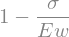

In [5]:
omega_val = sp.solve(sp.Eq(sigma, sigma_), omega)
omega_val[0]

In [6]:
sigma_1 = E * w
omega_val_1 = omega_val[0].subs(sigma, sigma_1)
omega_val_1

In [7]:
get_omega_1 = sp.lambdify((w), omega_val_1.subs(params), 'numpy')
omega_val_1.subs(params)

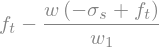

In [8]:
sigma_2 = f_t - (f_t - sigma_s) * (w / w_1) 
sigma_2

In [9]:
get_sigma_2 = sp.lambdify((w), sigma_2.subs(params), 'numpy')
sigma_2.subs(params)

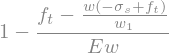

In [10]:
omega_val_2 = omega_val[0].subs(sigma, sigma_2)
omega_val_2

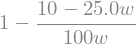

In [11]:
get_omega_2 = sp.lambdify((w), omega_val_2.subs(params), 'numpy')
omega_val_2.subs(params)

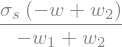

In [12]:
sigma_3 = sigma_s * (w_2 - w) / (w_2 - w_1)
sigma_3

In [13]:
get_sigma_3 = sp.lambdify((w), sigma_3.subs(params), 'numpy')
sigma_3.subs(params)

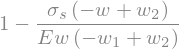

In [14]:
omega_val_3 = omega_val[0].subs(sigma, sigma_3)
omega_val_3

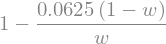

In [15]:
get_omega_3 = sp.lambdify((w), omega_val_3.subs(params), 'numpy')
omega_val_3.subs(params)

### Part 2
- Calculating damage when $w = w_1$

In [16]:
omega_2_rep = omega_val_2.subs(w, w_1)
omega_2 = omega_2_rep.subs(params)
omega_2

Stiffness:
\begin{gather*}
\mathrm{E(w_1)} = (1 - \omega) \mathrm{E}
\end{gather*}

In [17]:
E_w_1 = (1 - omega_2) * E.subs(params)
E_w_1

### Part 3
- Sketch graphically the derived damage function in a damage opening relation

In [18]:
omega_3_rep = omega_val_3.subs(w, w_2)
omega_3 = omega_3_rep.subs(params)
omega_3

In [25]:
def get_response(w_2=1, n_steps=100): 
    omega_rec = [] 
    w = np.linspace(0,w_2,n_steps+1)
    w_0 = 0.1
    w_1 = 0.2
    for w_ in w:
        omega = []
        if w_ <= w_0:
            omega = get_omega_1(w_)    
        elif w_ <= w_1: 
            omega = get_omega_2(w_)
        else:
            omega = get_omega_3(w_)
        omega_rec.append(omega) 
    return (
        w, np.array(omega_rec,dtype=np.float_)
    )

<IPython.core.display.Javascript object>


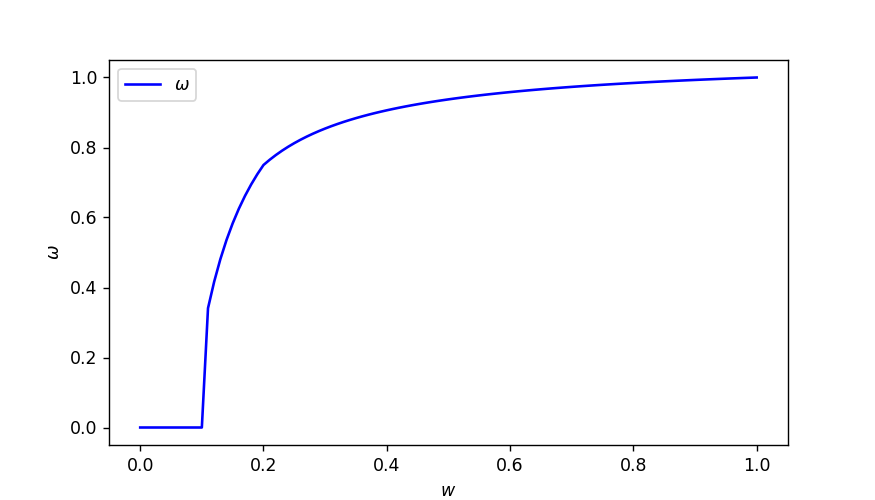

In [26]:
fig, ((ax1)) = plt.subplots(1,1,figsize=(7,4))
n_step_range = np.arange(1,2)*100
w_v = 1
for n_step in n_step_range:
    w, omega_rec = get_response(w_v,n_step) 
    #print(w, omega_rec) 
    ax1.plot(w, omega_rec[:], color='b', label = '$\omega$')
    ax1.set_xlabel('$w$'); ax1.set_ylabel('$\omega$')
    ax1.legend()

## Calculating local cohesive breaking energy
\begin{gather*}
g_f(x) =\int_{0}^{w_x} \sigma(w)dw
\end{gather*}

In [51]:
w = sp.Symbol(r'w', real = True)
w_x = sp.Symbol('w_x', nonnegative = True)
f_c = sp.Symbol('f_c', nonnegative = True)
sigma_s = sp.Symbol(r'\sigma_s', nonnegative = True)
P_max = sp.Symbol('P_max', nonnegative = True)
D = sp.Symbol('D', nonnegative = True)
H_0 = sp.Symbol('H_0', nonnegative = True)
B = sp.Symbol('B', nonnegative = True)
a_0 = sp.Symbol('a_0', nonnegative = True)
f_t = sp.Symbol('f_t', nonnegative = True)
CMOD_c = sp.Symbol('CMOD_c', nonnegative = True)

In [52]:
params = {P_max : 10, 
          D : 2, 
          H_0 : 1, 
          B : 1.5, 
          E : 1000, 
          a_0 : 0.1, 
          CMOD_c : 0.15,
          sigma_s : 5,
          f_t : 10
         }

\begin{gather*}
w_x = CMOD_c\left[\left(1 - \frac{x}{a_c}\right)^2 + \left(1.081 - 1.149 \left(\frac{a_c}{D}\right)\right)\left[\frac{x}{a_c} - \left(\frac{a_0}{a_c}\right)^2\right]\right]^{1/2} 
\end{gather*}
\begin{gather*}
a_i = \frac{2}{\pi}(D + H_0) \arctan{\sqrt{\frac{B E C_{si}}{32.6} - 0.1135}} - H_0
\end{gather*}

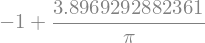

In [53]:
C_si = CMOD_c / P_max
a_i = (2/sp.pi) * (D + H_0) * sp.atan(sp.sqrt((B*E*C_si)/(32.6)-0.1135)) - H_0
a_c_ = a_i.subs(params)
a_c_

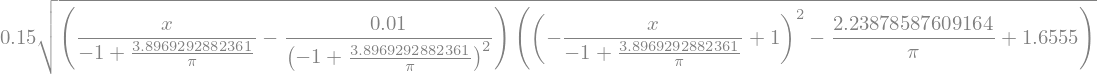

In [54]:
a_c  = sp.Symbol('a_c', nonnegative = True)
x = sp.Symbol('x', nonnegative = True)
w_x = CMOD_c * sp.sqrt(((1 - x/a_c)**2 + (1.081 - 1.149*(a_c/D)))*(x/a_c - (a_0/a_c)**2))
w_x_ = w_x.subs(a_c,a_c_).subs(params)
w_x_

In [55]:
get_w_x = sp.lambdify((x), w_x_, 'numpy')
get_w_x

<function _lambdifygenerated(x)>

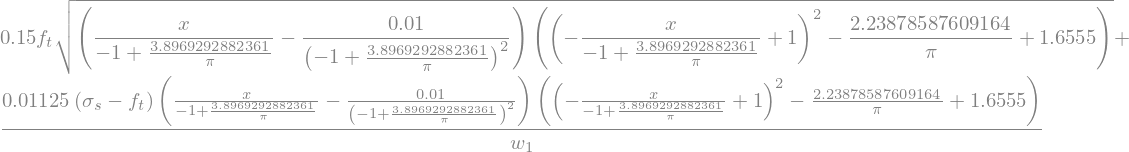

In [56]:
g_1 = sp.integrate(sigma_2, (w, 0, w_x_)) 
g_1

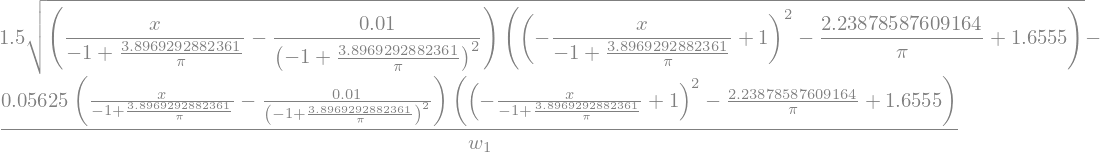

In [68]:
g_1_ = g_1.subs(params)
get_g_1 = sp.lambdify((x, w_1), g_1_, 'numpy')
get_g_1
g_1_

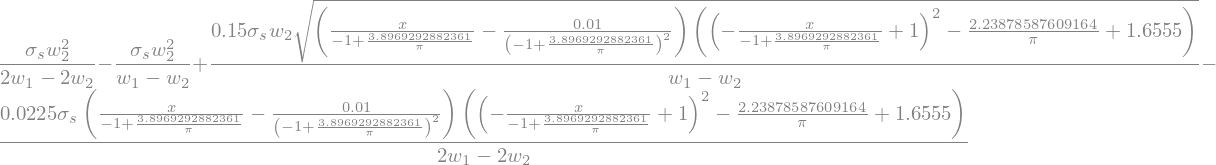

In [69]:
g_2 = sp.integrate(sigma_3,(w, w_x_, w_2))
g_2

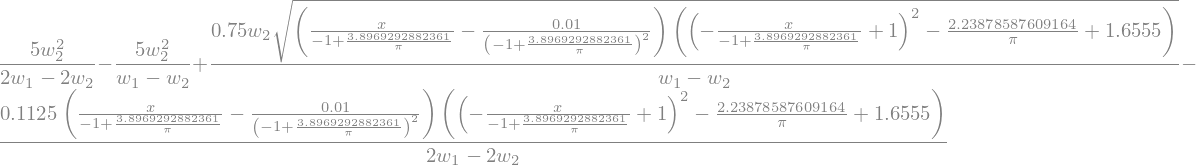

In [70]:
g_2_ = g_2.subs(params)
get_g_2 = sp.lambdify((x, w_1, w_2), g_2_, 'numpy')
get_g_2
g_2_

In [131]:
def get_response(n_steps=10): 
    w_rec, g_rec = [], [] 
    x = np.linspace(0.1,1,n_steps+1)
    w_1 = 0.2
    w_2 = 1
    for x_ in x:
        g = []
        w_ = []
        w_ = get_w_x(x_)
        if w_ <= w_1:
            g = get_g_1(x_, w_1)
        elif w_1 < w_ <= w_2:
            g = get_g_2(x_, w_1, w_2)
            #print(g)
        #print(w_)
        w_rec.append(w_)
        g_rec.append(g)
    return (
        x, np.array(w_rec,dtype=np.float_),
        np.array(g_rec,dtype=np.float_)
    )

<img src="gfdistribution.png" width="600"/> 

<IPython.core.display.Javascript object>


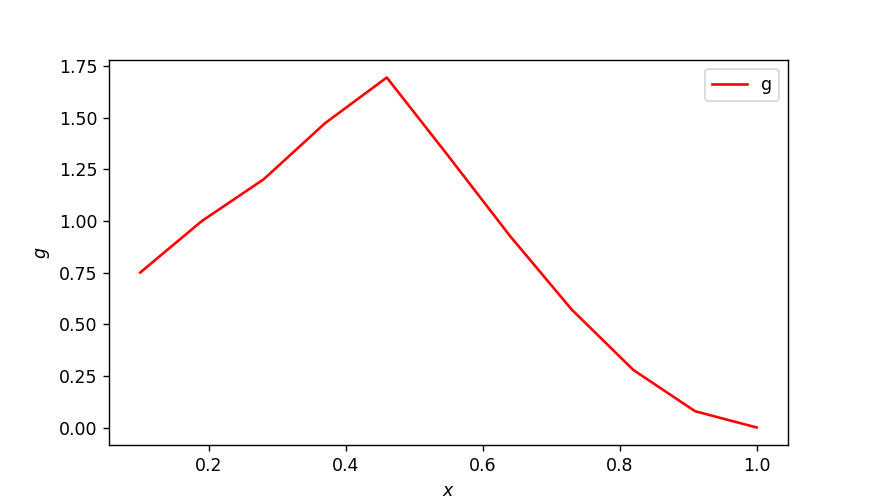

In [133]:
fig, ((ax1)) = plt.subplots(1,1,figsize=(7,4))
n_step_range = np.arange(1,2)*10
for n_step in n_step_range:
    x, w_arr,g_arr = get_response(n_step) 
    #print(x, g_arr) 
    ax1.plot(x, g_arr[:], color='r', label = 'g')
    ax1.set_xlabel('$x$'); ax1.set_ylabel('$g$')
    ax1.legend()

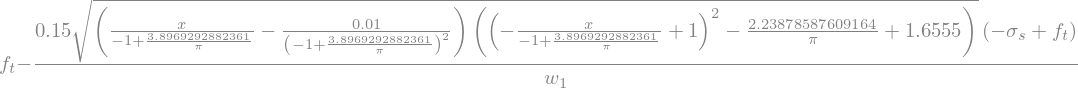

In [117]:
x = sp.Symbol('x', nonnegative = True)
sigma_2 = f_t - (f_t - sigma_s) * (w_x_ / w_1) 
sigma_2

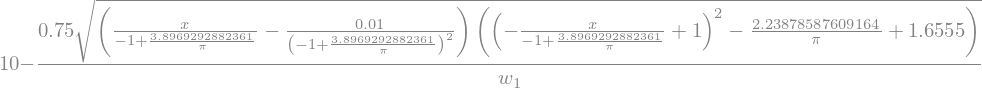

In [118]:
get_sigma_2 = sp.lambdify((x, w_1), sigma_2.subs(params), 'numpy')
sigma_2.subs(params)

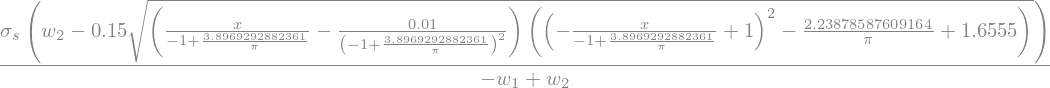

In [119]:
sigma_3 = sigma_s * (w_2 - w_x_) / (w_2 - w_1)
sigma_3

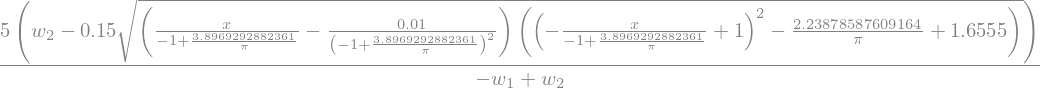

In [120]:
get_sigma_3 = sp.lambdify((x, w_1, w_2), sigma_3.subs(params), 'numpy')
sigma_3.subs(params)

In [134]:
def get_response(n_steps=10): 
    sigma_rec = [] 
    x = np.linspace(0.1,1,n_steps+1)
    w_1 = 0.2
    w_2 = 1
    for x_ in x:
        w_ = []
        w_ = get_w_x(x_)
        if w_ <= w_1: 
            sigma = get_sigma_2(x_, w_1)
        elif w_1 < w_ <= w_2 :
            sigma = get_sigma_3(x_, w_1, w_2) 
        sigma_rec.append(sigma)
    return (
        x, np.array(sigma_rec,dtype=np.float_)
    )

<img src="cracktipzoom.png" width="600"/> 

<IPython.core.display.Javascript object>


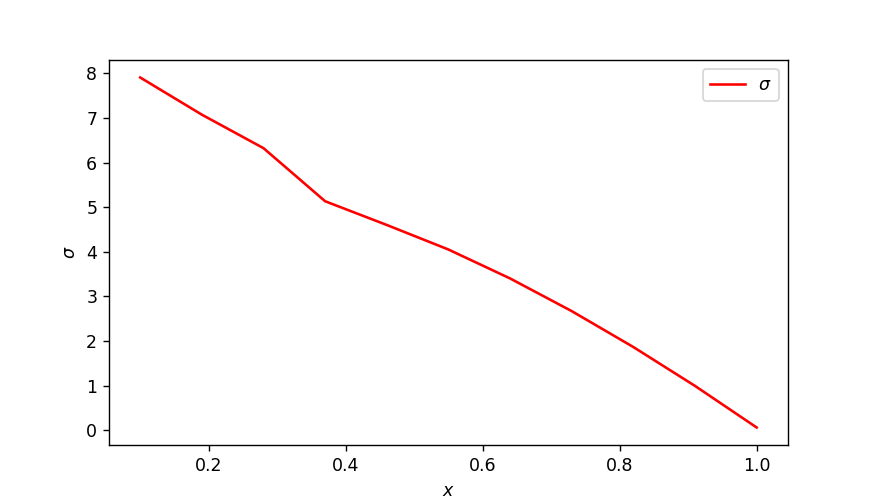

[0.1  0.19 0.28 0.37 0.46 0.55 0.64 0.73 0.82 0.91 1.  ] [7.90560519 7.07319144 6.32233082 5.13284611 4.60144782 4.05150584
 3.40322475 2.67137169 1.86624264 0.99519539 0.06371618]


In [135]:
fig, ((ax1)) = plt.subplots(1,1,figsize=(7,4))
n_step_range = np.arange(1,2)*10
for n_step in n_step_range:
    x, sigma_rec = get_response(n_step) 
    print(x, sigma_rec) 
    ax1.plot(x, sigma_rec[:], color='r', label = '$\sigma$')
    ax1.set_xlabel('$x$'); ax1.set_ylabel('$\sigma$')
    ax1.legend()

## Energy Dissipation at Crack Extension
To determine the energy dissipation at any crack extension $a$ in FPZ, the summation of the values of local cohesive breaking energy at every location in the range of $a$ to $a_0$ is obtained as:
\begin{gather*}
\Pi = \int_{a_0}^{a} g(f_x)dx
\end{gather*}

In [ ]:
w = sp.Symbol(r'w', real = True)
w_x = sp.Symbol('w_x', nonnegative = True)

In [ ]:
g_1 = sp.integrate(sigma_2, (w, 0, w)) 
g_1

In [ ]:
g_2 = sp.integrate(sigma_3,(w, w_x, w))
g_2

In [ ]:
Pi = sp.integrate()